In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from math import sqrt

In [2]:
#Obtain data and modifying
data = pd.read_csv('/Users/neveh/Desktop/Volumetric_features.csv')

In [3]:
#Split features and target
X = data.drop('Age', axis=1)
y = data['Age']

In [4]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

MODEL #1

In [6]:
#alpha array
alphas = np.linspace(0.01, 0.2, num=20)

r2_test_pen = []
r2_train_pen = []
for alpha in alphas:
    # Create Lasso model with alpha parameter
    lasso = Lasso(alpha=alpha, max_iter=10000)

    # Fit model on training data
    lasso.fit(X_train_scaled, y_train)

    # Predict on testing and training data
    y_pred_test_pen = lasso.predict(X_test_scaled)
    y_pred_train_pen = lasso.predict(X_train_scaled)

    # Calculate R-squared score on testing and training data
    r2_test_pen.append(r2_score(y_test, y_pred_test_pen))
    r2_train_pen.append(r2_score(y_train, y_pred_train_pen))

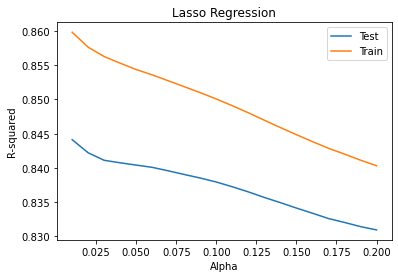

In [7]:
#plot to demonstrate accuracy and whether or not the model is underfitting or overfitting
plt.plot(alphas, r2_test_pen, label='Test')
plt.plot(alphas, r2_train_pen, label='Train')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Lasso Regression')
plt.legend()
plt.show()

Based on the plot, the smaller alpha values the more accurate the model. However, the model starts to overfit. The optimal alpha value is at around 0.13

In [8]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

y_pred_test_pen = lasso.predict(X_test_scaled)
y_pred_train_pen = lasso.predict(X_train_scaled)

r2_test_pen = r2_score(y_test, y_pred_test_pen)
r2_train_pen = r2_score(y_train, y_pred_train_pen)
rmse_train_pen = np.sqrt(MSE(y_train,y_pred_train_pen))/(max(y_train)-min(y_train))
rmse_test_pen = np.sqrt(MSE(y_test,y_pred_test_pen))/(max(y_test)-min(y_test))

print("Testing R2 for an alpha of 0.13: ", r2_test_pen)
print('Testing MSE an alpha of 0.13:', rmse_test_pen)
print("Training R2 for an alpha of 0.13: ", r2_train_pen)
print('Training MSE an alpha of 0.13:', rmse_train_pen)

Testing R2 for an alpha of 0.13:  0.8441284468728628
Testing MSE an alpha of 0.13: 0.10391427719386863
Training R2 for an alpha of 0.13:  0.859826649603929
Training MSE an alpha of 0.13: 0.09639333918810934


MODEL #2

In [9]:
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)

y_pred_test_svm = svm.predict(X_test_scaled)
y_pred_train_svm = svm.predict(X_train_scaled)

In [10]:
r2_test_svm = r2_score(y_test, y_pred_test_svm)
r2_train_svm = r2_score(y_train, y_pred_train_svm)
rmse_train_svm = np.sqrt(MSE(y_train,y_pred_train_svm))/(max(y_train)-min(y_train))
rmse_test_svm = np.sqrt(MSE(y_test,y_pred_test_svm))/(max(y_test)-min(y_test))

print('Testing R2:', r2_test_svm)
print('Testing MSE:', rmse_test_svm)
print('Training R2:', r2_train_svm)
print('Training MSE:', rmse_train_svm)

Testing R2: 0.8250760320613991
Testing MSE: 0.11008203509694107
Training R2: 0.8368690025017236
Training MSE: 0.10398783681756892


MODEL #3

In [11]:
#max depth array
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

r2_test_rf = []
r2_train_rf = []
for n in max_depth:
    rf =  RandomForestRegressor(random_state=142, max_depth = n)

    #Fit model on training data
    rf.fit(X_train, y_train)

    #Predict on testing and training data
    y_pred_test_rf = rf.predict(X_test)
    y_pred_train_rf = rf.predict(X_train)

    # Calculate R-squared score on testing and training data
    r2_test_rf.append(r2_score(y_test, y_pred_test_rf))
    r2_train_rf.append(r2_score(y_train, y_pred_train_rf))

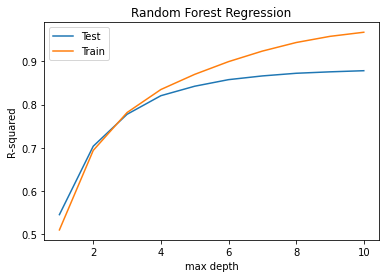

In [12]:
#plot to demonstrate accuracy and whether or not the model is underfitting or overfitting
plt.plot(max_depth, r2_test_rf, label='Test')
plt.plot(max_depth, r2_train_rf, label='Train')
plt.xlabel('max depth')
plt.ylabel('R-squared')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [13]:
#max features array
max_features = np.linspace(0.1, 1, num=10)

r2_test_rf = []
r2_train_rf = []
for n in max_features:
    rf =  RandomForestRegressor(random_state=142, max_features = n, max_depth = 4)

    #Fit model on training data
    rf.fit(X_train, y_train)

    #Predict on testing and training data
    y_pred_test_rf = rf.predict(X_test)
    y_pred_train_rf = rf.predict(X_train)

    # Calculate R-squared score on testing and training data
    r2_test_rf.append(r2_score(y_test, y_pred_test_rf))
    r2_train_rf.append(r2_score(y_train, y_pred_train_rf))

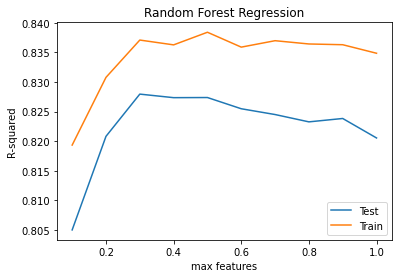

In [14]:
#plot to demonstrate accuracy and whether or not the model is underfitting or overfitting
plt.plot(max_features, r2_test_rf, label='Test')
plt.plot(max_features, r2_train_rf, label='Train')
plt.xlabel('max features')
plt.ylabel('R-squared')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [15]:
rf =  RandomForestRegressor(random_state=142, max_features = 0.4, max_depth = 4)
rf.fit(X_train, y_train)

y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

In [16]:
r2_test_rf = r2_score(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(MSE(y_train,y_pred_train_rf))/(max(y_train)-min(y_train))
rmse_test_rf = np.sqrt(MSE(y_test,y_pred_test_rf))/(max(y_test)-min(y_test))

print('Testing R2:', r2_test_rf)
print('Testing MSE:', rmse_test_rf)
print('Training R2:', r2_train_rf)
print('Training MSE:', rmse_train_rf)

Testing R2: 0.8273451483365252
Testing MSE: 0.10936571158817632
Training R2: 0.8362669662733029
Training MSE: 0.10417954407071821
